In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Diabetes Classification.csv")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Avoid line breaks
pd.set_option('display.max_colwidth', None)  # Show full column values
df

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No
5,50,Female,25,Normal,100,5.7,No,No,Healthy,Regular,No
6,60,Male,30,Normal,120,6.4,No,No,Healthy,Regular,No
7,70,Female,35,Normal,140,7.1,No,No,Healthy,Regular,No
8,45,Male,25,Low,80,5.0,Yes,Yes,Poor,No,No
9,55,Female,30,Normal,100,5.7,Yes,Yes,Poor,No,No


In [3]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [4]:
df.tail()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
123,17,Female,15,Normal,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Normal,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,High,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,High,160,7.8,No,Yes,Poor,No,Yes
127,37,Female,34,High,180,8.5,No,Yes,Poor,No,Yes


In [5]:
df.shape

(128, 11)

Checking Null value 

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

checking duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

cheking value_counts and dtype of the columns

In [8]:


for i in df.columns:
    print(f"{i}")
    print(df[i].value_counts().to_dict())
    print("-"*75)  

Age
{40: 8, 50: 7, 45: 7, 65: 6, 55: 6, 60: 6, 25: 6, 35: 6, 30: 6, 75: 4, 70: 4, 18: 3, 23: 3, 28: 3, 33: 3, 38: 3, 43: 3, 17: 3, 15: 3, 22: 3, 37: 3, 12: 3, 20: 3, 32: 3, 27: 3, 53: 2, 48: 2, 63: 2, 58: 2, 68: 2, 42: 2, 47: 2, 52: 2, 57: 2, 62: 2}
---------------------------------------------------------------------------
Gender
{'Male': 68, 'Female': 60}
---------------------------------------------------------------------------
BMI
{25: 7, 30: 7, 35: 7, 15: 6, 29: 6, 24: 6, 34: 6, 19: 6, 40: 5, 20: 5, 39: 5, 54: 4, 44: 4, 49: 4, 59: 4, 32: 3, 22: 3, 27: 3, 17: 3, 14: 3, 10: 3, 42: 3, 37: 3, 50: 2, 45: 2, 60: 2, 47: 2, 65: 2, 55: 2, 67: 2, 52: 2, 57: 2, 62: 2, 64: 2}
---------------------------------------------------------------------------
Blood Pressure
{'High': 79, 'Normal': 39, 'Low': 10}
---------------------------------------------------------------------------
FBS
{100: 16, 120: 16, 140: 16, 80: 15, 160: 13, 180: 12, 200: 8, 220: 8, 240: 8, 260: 8, 280: 8}
------------------

In [9]:
df['Diet'].value_counts()

Diet
Poor       79
Healthy    49
Name: count, dtype: int64

In [10]:
df['Exercise'].value_counts()

Exercise
No         79
Regular    49
Name: count, dtype: int64

In [11]:
df.head(2)

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes


In [12]:
df.dtypes

Age                             int64
Gender                         object
BMI                             int64
Blood Pressure                 object
FBS                             int64
HbA1c                         float64
Family History of Diabetes     object
Smoking                        object
Diet                           object
Exercise                       object
Diagnosis                      object
dtype: object

EDA-Taking univariate of each column

In [13]:
# checking Numerical_column

In [14]:
df.dtypes

Age                             int64
Gender                         object
BMI                             int64
Blood Pressure                 object
FBS                             int64
HbA1c                         float64
Family History of Diabetes     object
Smoking                        object
Diet                           object
Exercise                       object
Diagnosis                      object
dtype: object

In [15]:
Numerical_col=df.select_dtypes(include=['int64','float64'])

In [16]:
Numerical_col.head(2)

,Age,BMI,FBS,HbA1c
0,45,25,100,5.7
1,55,30,120,6.4


In [17]:
print(plt)

<module 'matplotlib.pyplot' from 'c:\\Users\\akhil\\Documents\\preprocessing\\myenv\\Lib\\site-packages\\matplotlib\\pyplot.py'>


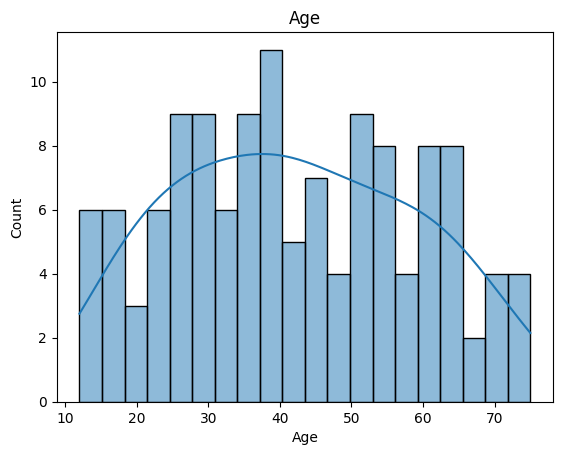

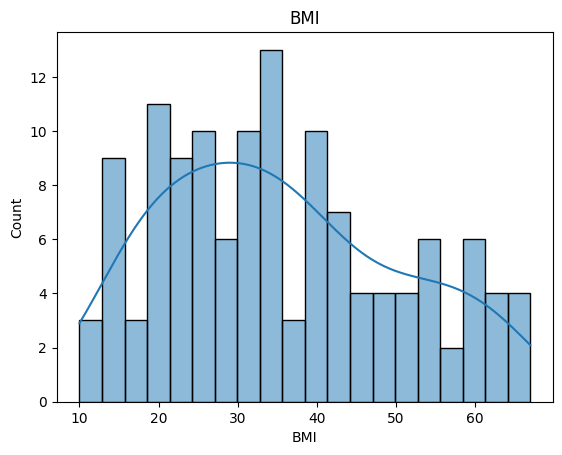

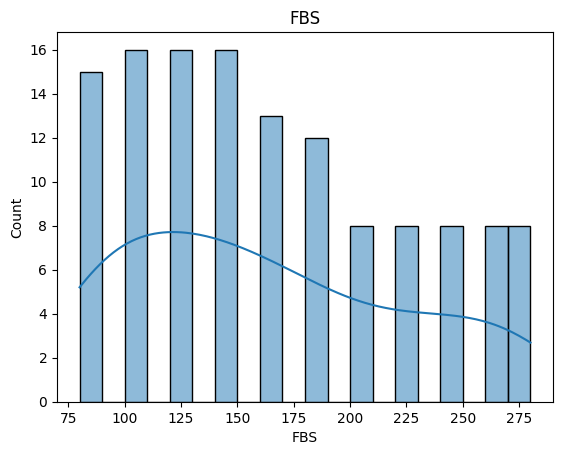

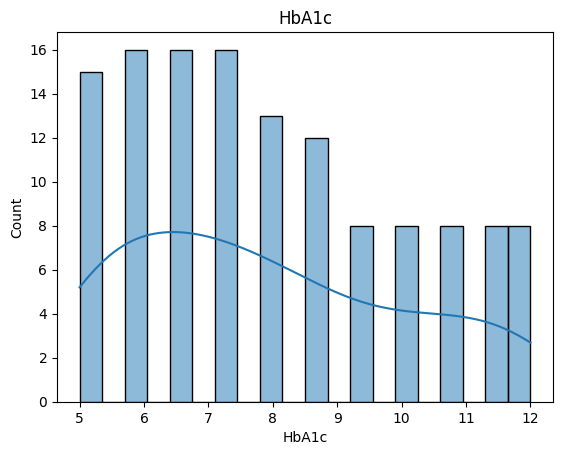

In [18]:
for col in Numerical_col:
    
    sns.histplot(x=df[col],bins=20,kde=True)  
    plt.title(col)
    plt.show()

In [19]:
# Analysing-Categorical_cool

In [20]:
categorical_col=df.select_dtypes(include=["object"]).columns.tolist()

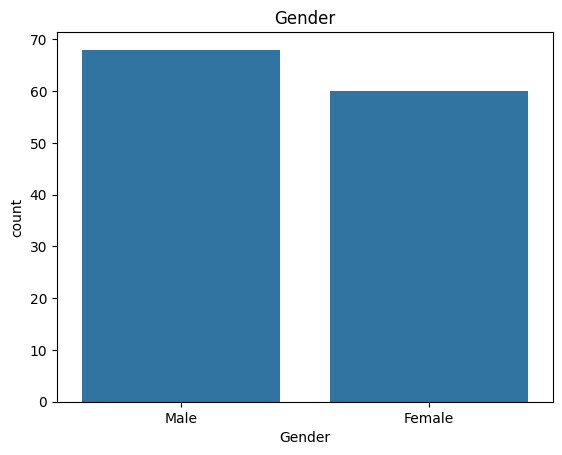

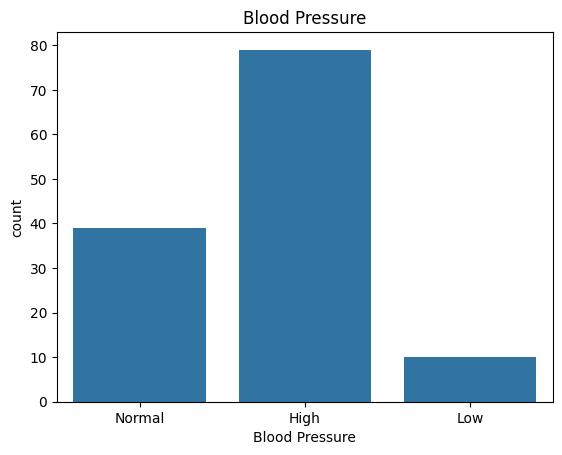

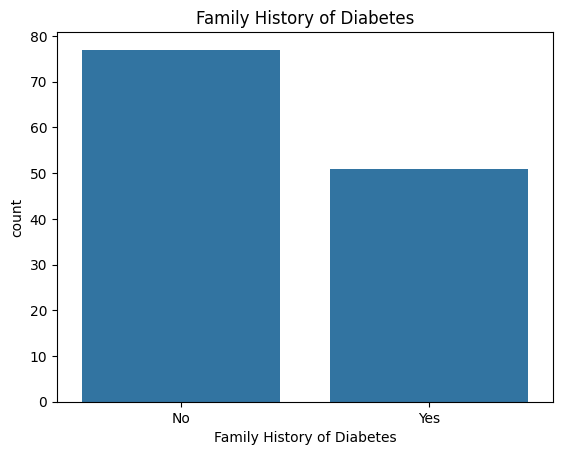

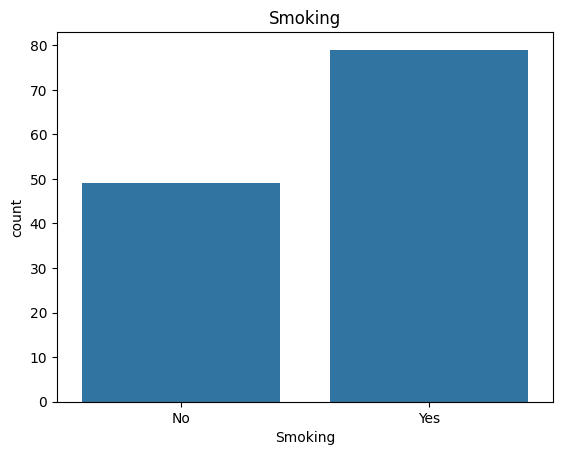

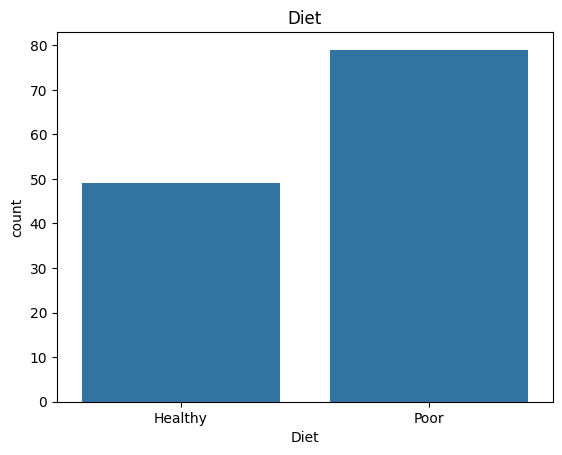

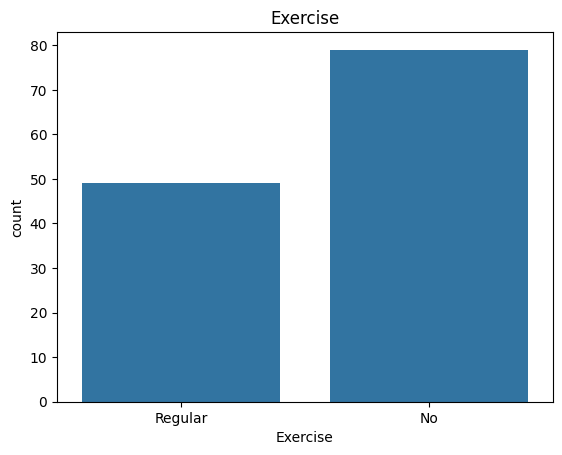

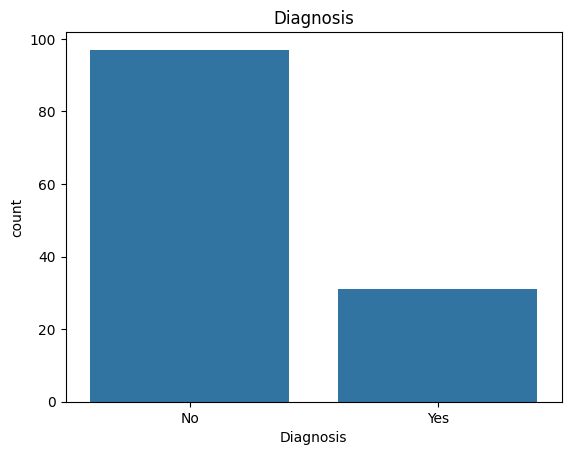

In [21]:
for i in categorical_col:
    sns.countplot(x=df[i])
    plt.title(i)
    plt.show()

Bivariate

In [22]:
#Numerical vs categorical

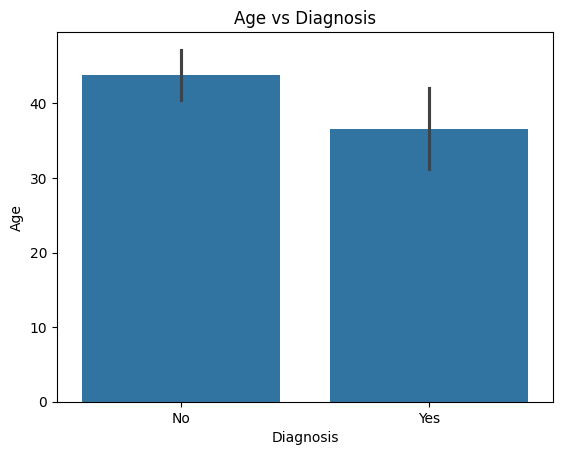

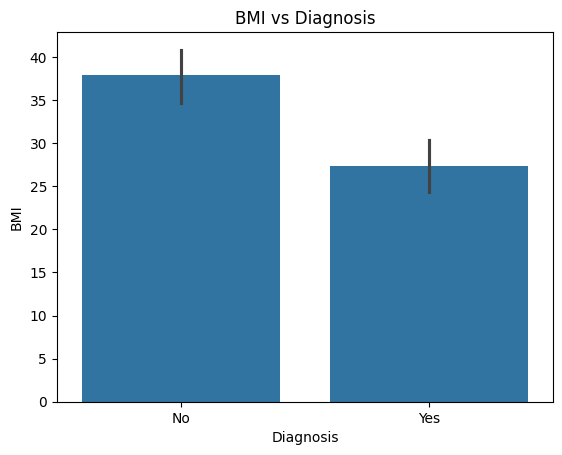

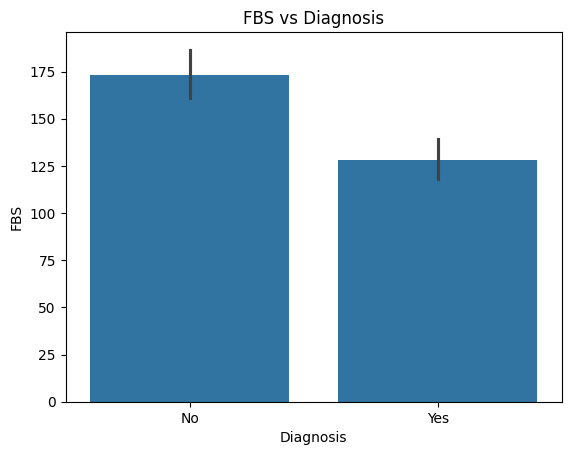

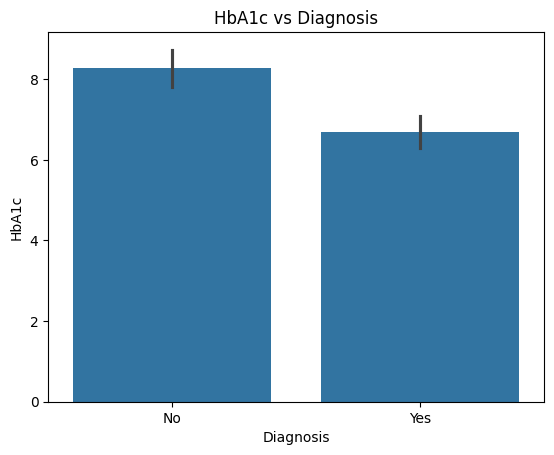

In [23]:
for i in Numerical_col:
    sns.barplot(x=df['Diagnosis'],y=df[i])
    plt.title(f"{i} vs Diagnosis")
    plt.show()

In [24]:
#categorical vs categorical

In [26]:
categorical_col.head(2)

AttributeError: 'list' object has no attribute 'head'

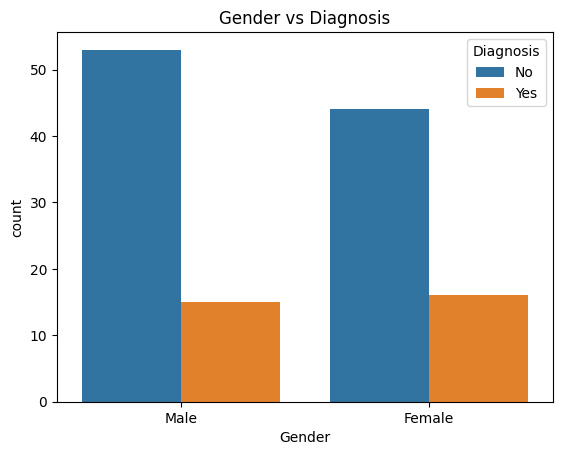

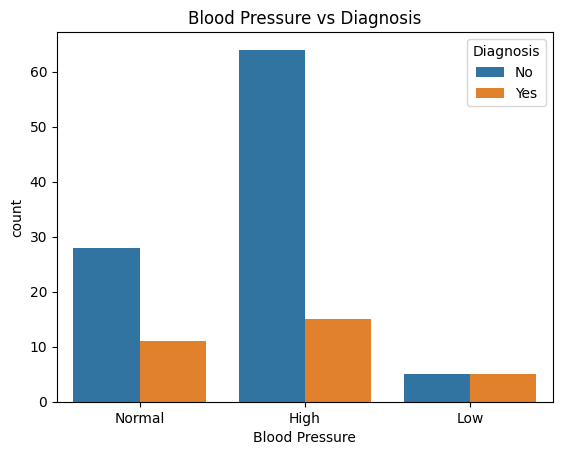

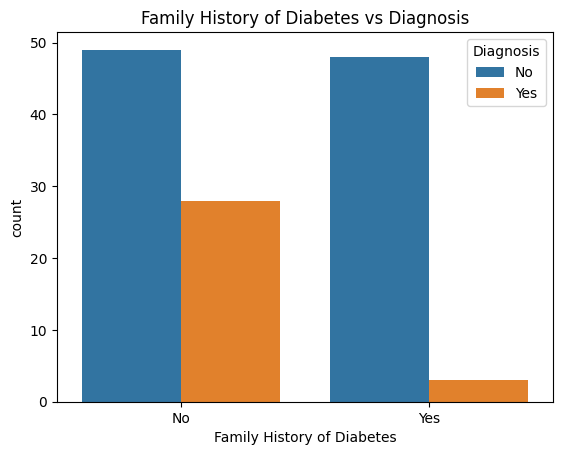

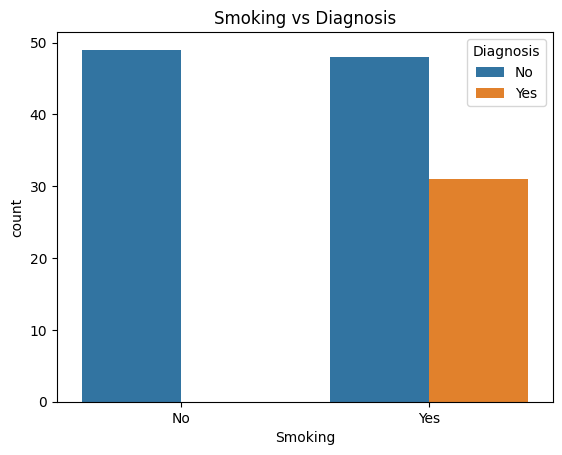

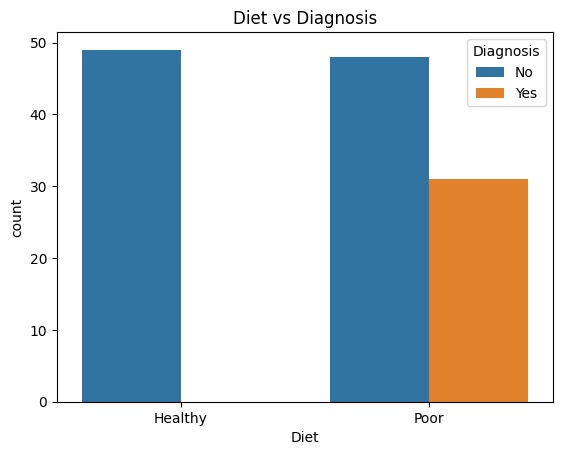

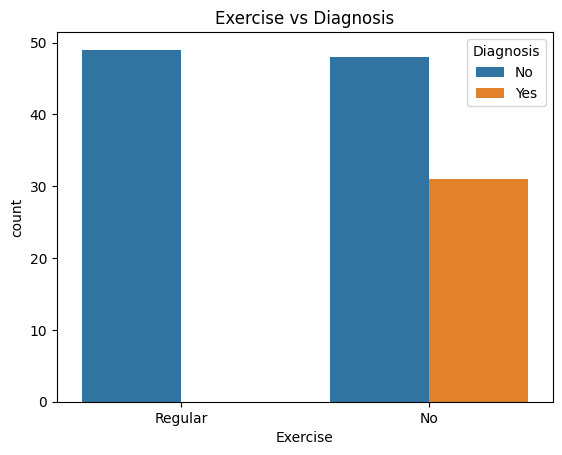

In [27]:
for i in categorical_col:
    if i!="Diagnosis":
        sns.countplot(x=df[i],hue=df['Diagnosis'],data=df)
        plt.title(f"{i} vs Diagnosis")
        plt.show()

In [28]:
df.head(2)

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes


Multivariate

<Figure size 1200x600 with 0 Axes>

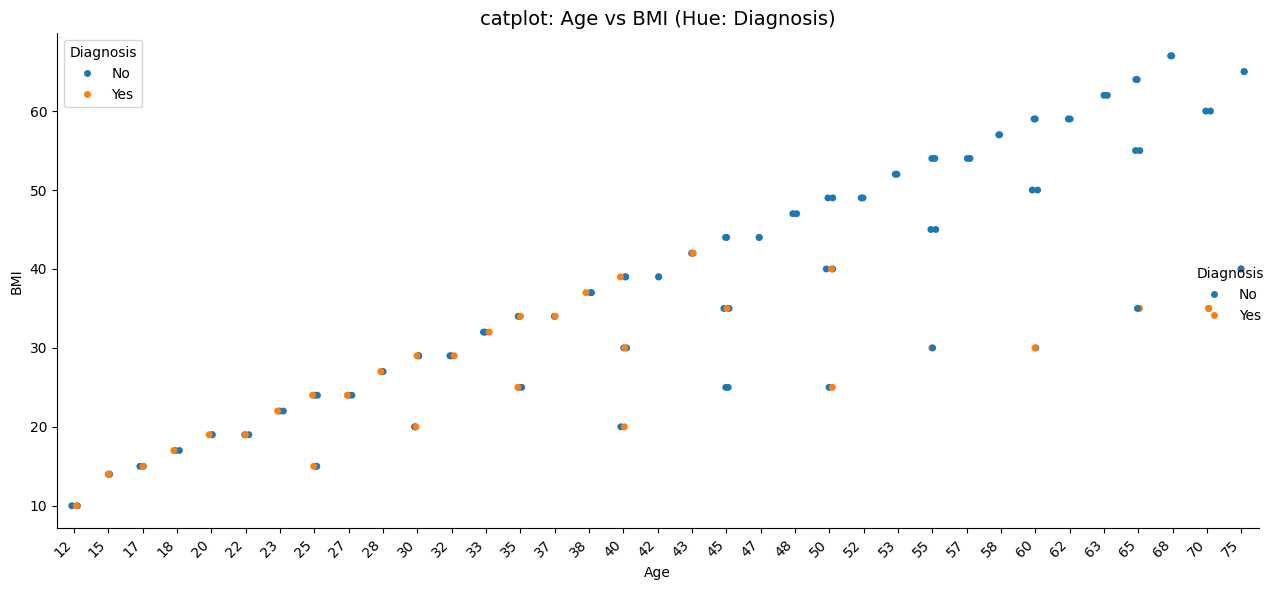

<Figure size 1200x600 with 0 Axes>

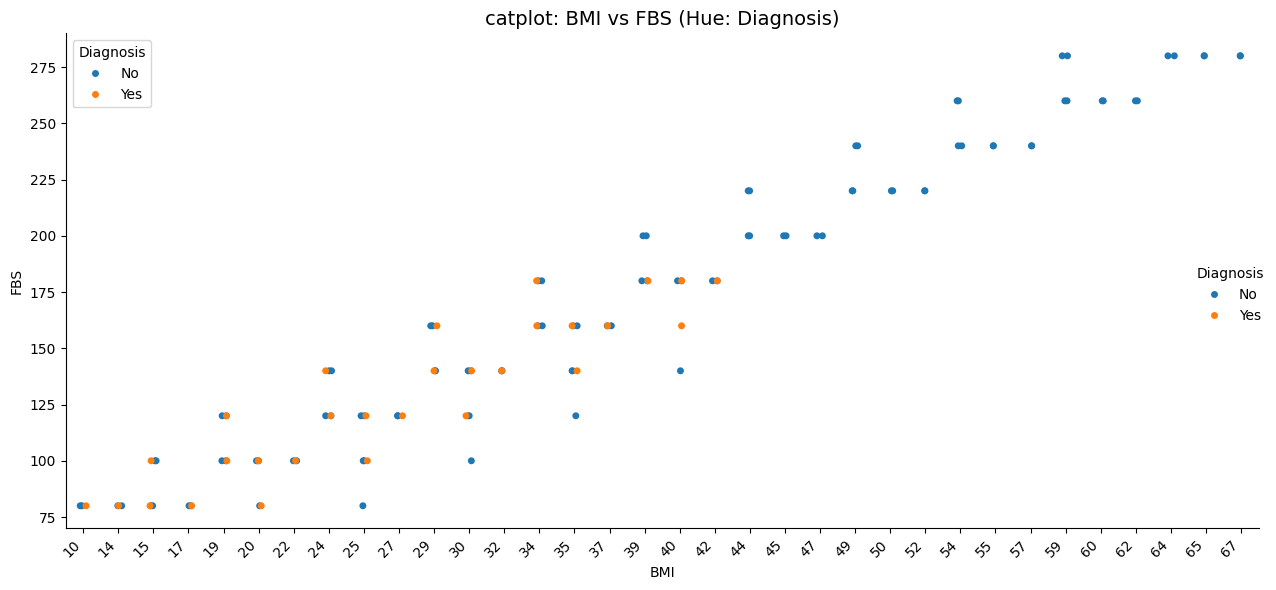

<Figure size 1200x600 with 0 Axes>

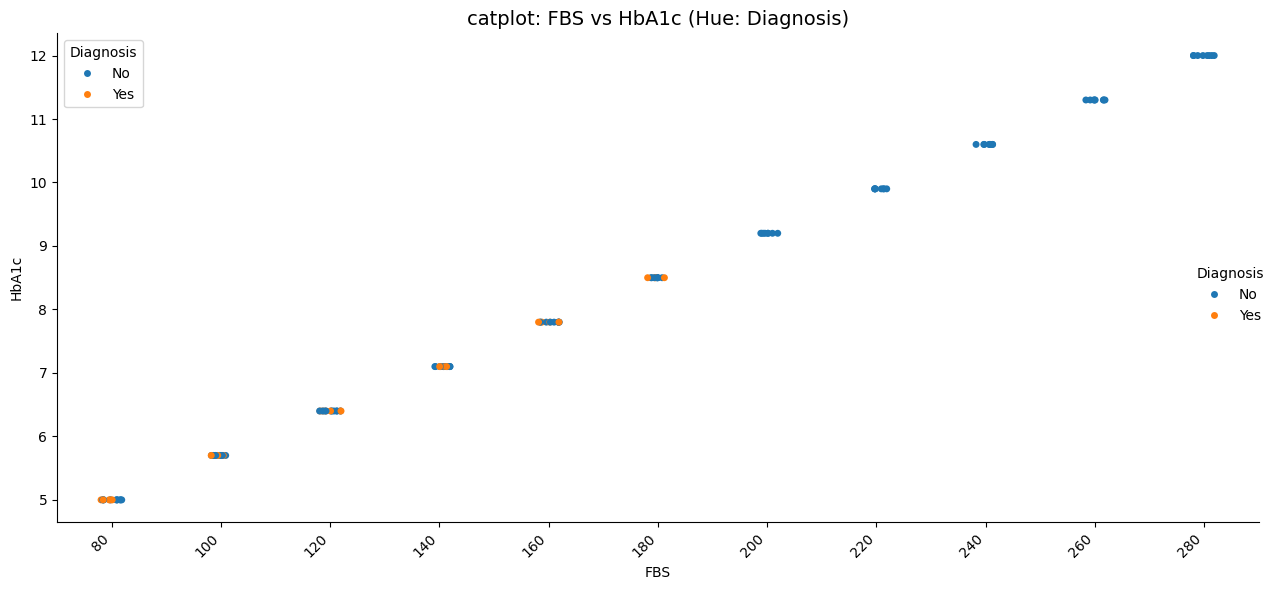

In [29]:
#Two_numerical_col vs categorical
Numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i in range(len(Numerical_col) - 1): 
    plt.figure(figsize=(12, 6))  
    
   
    g = sns.catplot(x=Numerical_col[i], y=Numerical_col[i+1], hue="Diagnosis", data=df, height=6, aspect=2)

    
    g.set_xticklabels(rotation=45, ha='right', fontsize=10)
    
    
    plt.title(f"catplot: {Numerical_col[i]} vs {Numerical_col[i+1]} (Hue: Diagnosis)", fontsize=14)
    plt.legend(title="Diagnosis")

   
    plt.tight_layout()
    
    plt.show()
    

In [30]:
print(categorical_col[:5])

['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet']


<Figure size 800x500 with 0 Axes>

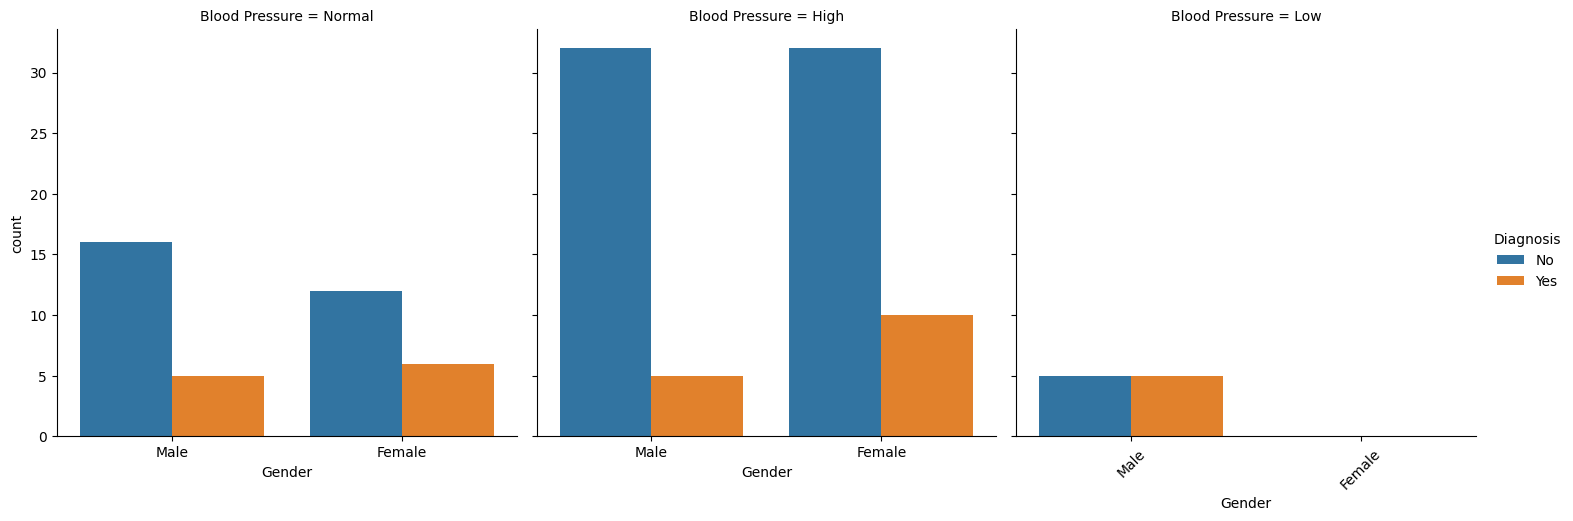

<Figure size 800x500 with 0 Axes>

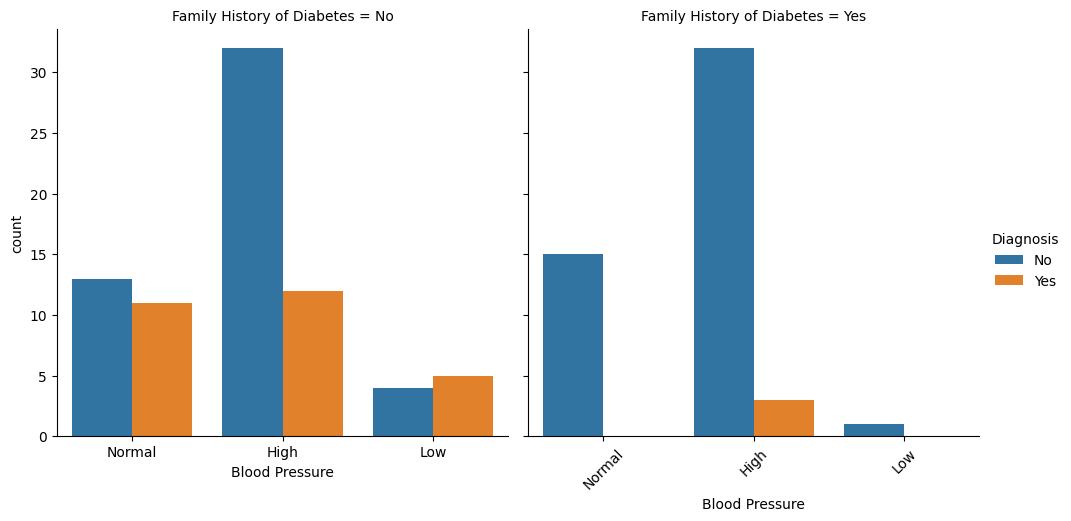

<Figure size 800x500 with 0 Axes>

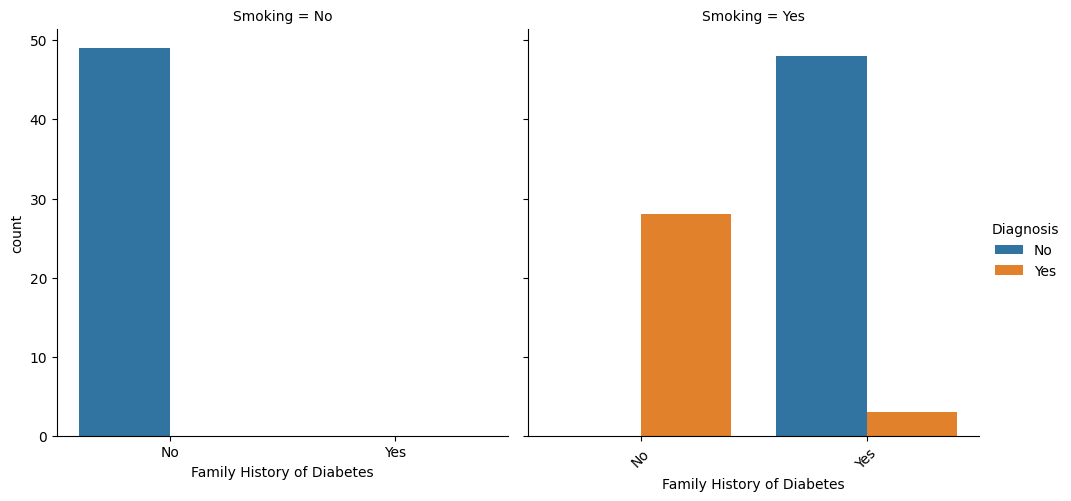

<Figure size 800x500 with 0 Axes>

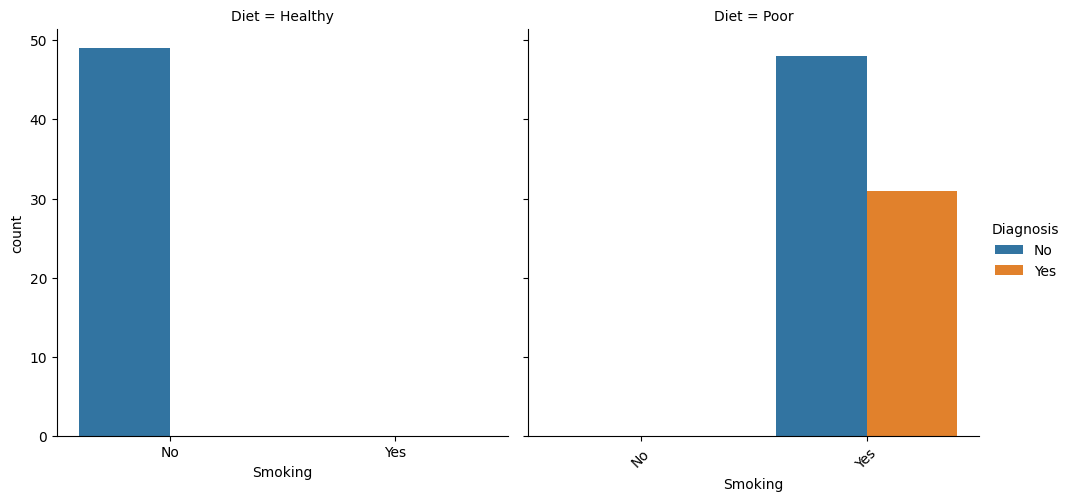

<Figure size 800x500 with 0 Axes>

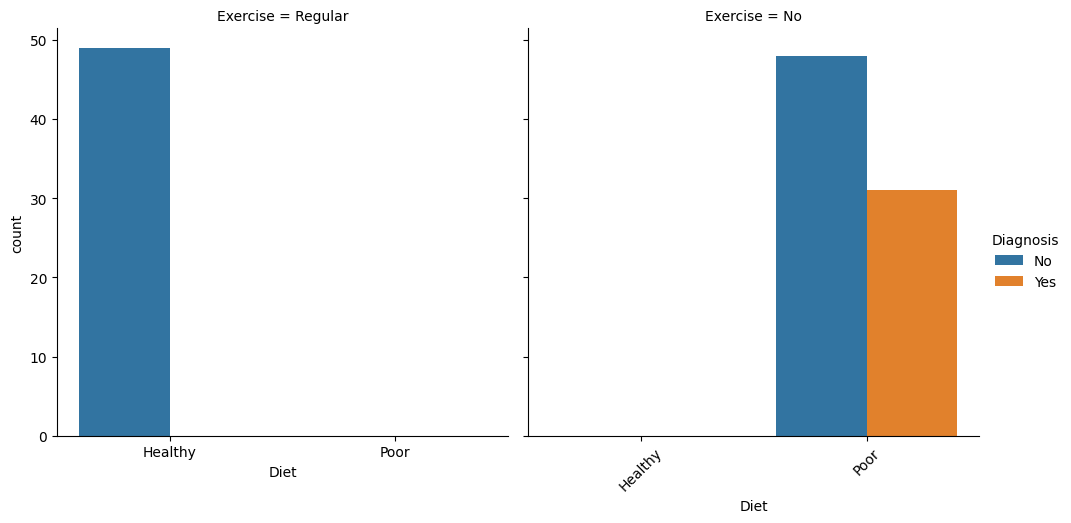

In [31]:
#multiple categorical column
for i in range(len(categorical_col) - 1):
    if categorical_col[i] != "Diagnosis" and categorical_col[i+1] != "Diagnosis":
        plt.figure(figsize=(8, 5))  

        sns.catplot(x=categorical_col[i], hue="Diagnosis", col=categorical_col[i+1], kind='count', data=df)

        plt.xticks(rotation=45)  
        plt.show()

Label Encoding

In [32]:

for i in categorical_col:
    label_encoding = LabelEncoder()  
    df[i] = label_encoding.fit_transform(df[i])  
    print(f"Encoding for {i}: {label_encoding.classes_}")  
    print('-' * 50)


Encoding for Gender: ['Female' 'Male']
--------------------------------------------------
Encoding for Blood Pressure: ['High' 'Low' 'Normal']
--------------------------------------------------
Encoding for Family History of Diabetes: ['No' 'Yes']
--------------------------------------------------
Encoding for Smoking: ['No' 'Yes']
--------------------------------------------------
Encoding for Diet: ['Healthy' 'Poor']
--------------------------------------------------
Encoding for Exercise: ['No' 'Regular']
--------------------------------------------------
Encoding for Diagnosis: ['No' 'Yes']
--------------------------------------------------


In [33]:
df.head(2)

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1


Checking outliers


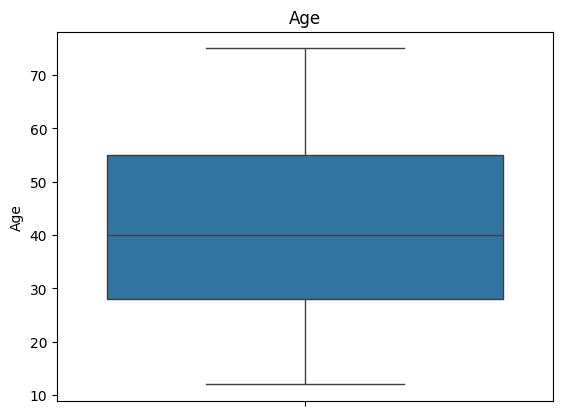

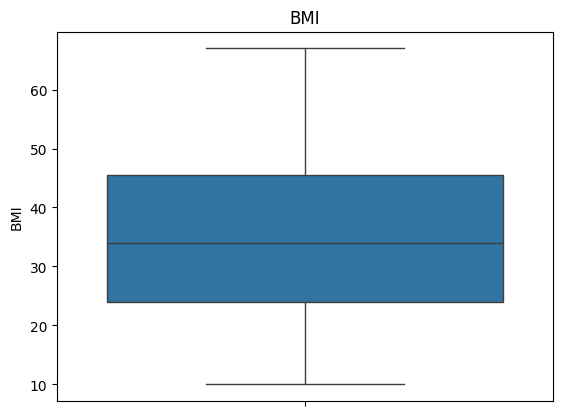

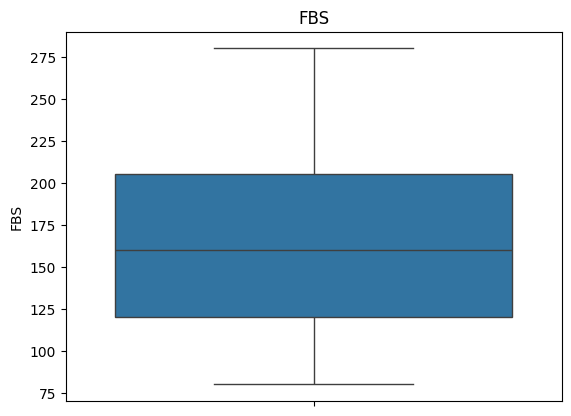

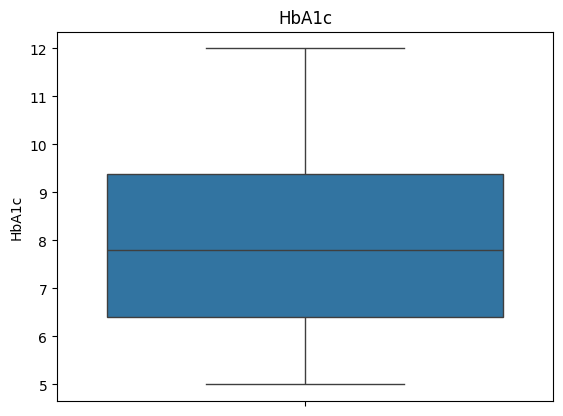

In [34]:
for i in Numerical_col:
     sns.boxplot(y=df[i])
     plt.title(f'{i}')
     plt.show()

### It has no outliers 

# Plotting correlation

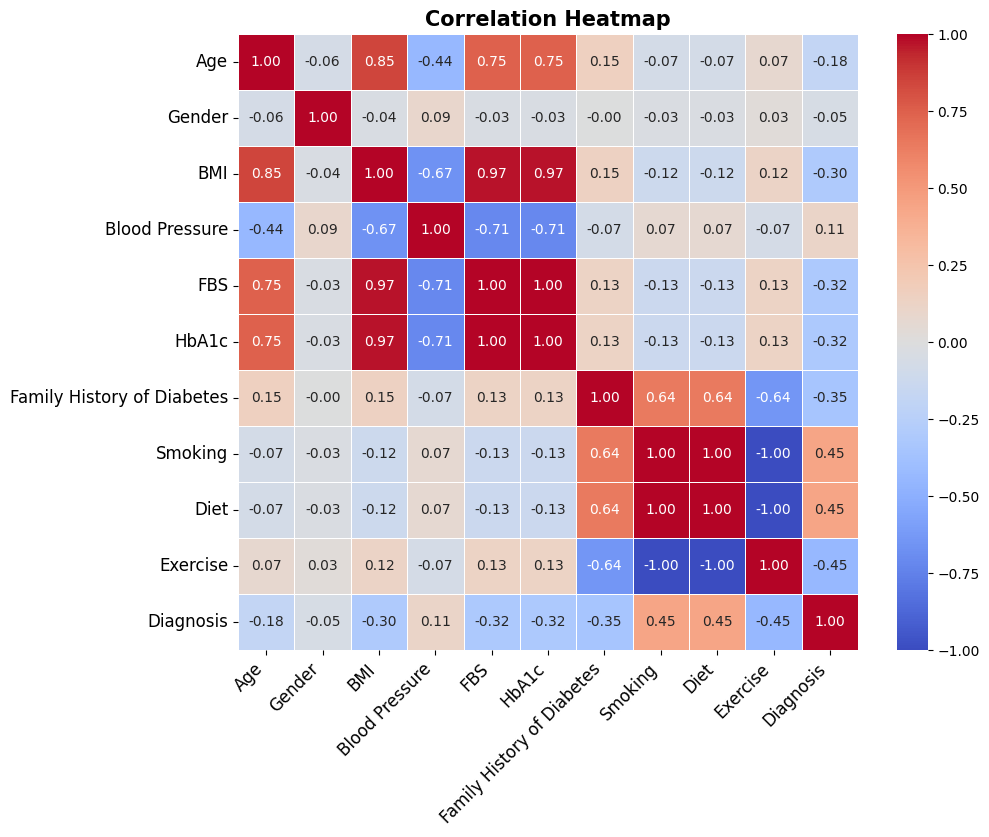

In [35]:
plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            annot_kws={"size": 10}, vmin=-1, vmax=1)  

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.title("Correlation Heatmap", fontsize=15, fontweight='bold')  # Improve title visibility
plt.show()

In [36]:
lis=[]
matrix_cor=df.corr()
for i in matrix_cor:
    if matrix_cor['Diagnosis'][i]< -0.3 or matrix_cor['Diagnosis'][i]>0.3:
        lis.append(i)

print(lis)        

['BMI', 'FBS', 'HbA1c', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise', 'Diagnosis']


In [37]:
df=df[lis]

In [38]:
df.head(2)

,BMI,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,25,100,5.7,0,0,0,1,0
1,30,120,6.4,1,1,1,0,1


Checking Multi collinearity

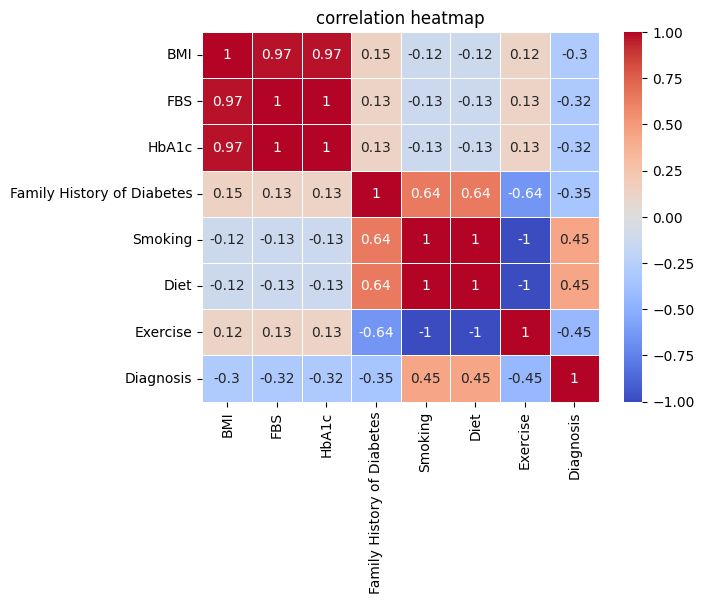

In [39]:
plt.Figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title('correlation heatmap')
plt.show()


In [40]:
df=df[['BMI','HbA1c','Family History of Diabetes','Diet','Exercise','Diagnosis']]

In [41]:
df.head(2)

,BMI,HbA1c,Family History of Diabetes,Diet,Exercise,Diagnosis
0,25,5.7,0,0,1,0
1,30,6.4,1,1,0,1


# Splitting

In [42]:
x=df.drop(columns=['Diagnosis'])
y=df['Diagnosis']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [49]:
x_train.shape

(102, 5)

In [50]:
x_test.shape

(26, 5)

# Scalling 

In [46]:
scaler=StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled=x_train.copy()
x_train_scaled[['BMI','HbA1c','Family History of Diabetes','Diet','Exercise']]=scaler.fit_transform(x_train[['BMI','HbA1c','Family History of Diabetes','Diet','Exercise']])

# Transform the testing data using the same scaler
x_test_scaled=x_train.copy()
x_test_scaled[['BMI','HbA1c','Family History of Diabetes','Diet','Exercise']]=scaler.transform(x_test[['BMI','HbA1c','Family History of Diabetes','Diet','Exercise']])

print(x_train_scaled)
print(x_test_scaled)

ValueError: Length of values (26) does not match length of index (102)